In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [78]:
def func_trapecio (x,A):
    a = A[0]
    b = A[1]
    c = A[2]
    d = A[3]
    if (x<a or x>d):
        u_a=0
    else:
        if (x>=a and x<b):
            u_a=(x-a)/(b-a)
        else:
            if (x>=b and x<=c):
                u_a=1
            else:
                if (x>c and x<=d):
                    u_a=1-((x-c)/(d-c))

    return (u_a)

In [79]:
def func_gauss (x,A):
    u = A[0]
    sig = A[1]
    u_a=np.exp(-(1/2)* np.power((x-u)/sig,2))
    return u_a

In [80]:
def func_membrecia (x,A):
    if (A.shape[0]>3):
        u_a = func_trapecio(x,A)
    else:
        u_a = func_gauss(x,A)
    return u_a


In [81]:
def func_Mmembrecia (x,M):
    u_i = np.zeros(M.shape[0])
    for i in range(M.shape[0]):
        u_i[i] = func_membrecia(x,M[i])
    return u_i

In [82]:
def func_centroide (M,reglas):
    centroides=np.zeros(M.shape[0])
    for i in reglas:
        a = M[i][0]
        b = M[i][1]
        c = M[i][2]
        d = M[i][3]
    #pregunto si es un triangulo
        if (b==c):
            centroides[i] = (a+b+d)/3
        else:
    #si no es un triangulo es un trapecio
            c1=(a+b+b)/3
            c2=b+(c-b)/2
            c3=(c+c+d)/3
            centroides[i]= (c1+c2+c3)/3
    return centroides


In [83]:
def func_area (y,M,reglas):
    area=np.zeros(M.shape[0])
    for j,i in enumerate(reglas):
        a = M[i][0]
        b = M[i][1]
        c = M[i][2]
        d = M[i][3]
        # print(f'a= {a}  b= {b} c= {c}  d= {d}')
    #pregunto si es un triangulo
        if (b==c):
            area[i] = y[j]*(d-a)/2
        else:
            # print(((d-a)+(c-b)))
    #si no es un triangulo es un trapecio
            area[i]= ((d-a)+(c-b))*y[j]/2
    return area

In [84]:
def func_area_gauss (M):
    area=np.zeros(M.shape[0])
    for i,A in enumerate(M): 
        area[i]=A[1]*np.power(2*math.pi,1/2)

In [85]:
def func_deFuzzificacion (y,M,reglas):
    areas= func_area(y,M,reglas)
    centroides = func_centroide(M,reglas)
    # print(f'area = {areas}   centroide = {centroides}')
    y_sal = (np.dot(areas,centroides))/np.sum(areas)
    return y_sal

In [103]:
def ctrl_borroso (x,M,S,reglas):
    y=[]
    for x in X:
        u_i = func_Mmembrecia(x,M)
        y.append(u_i)
    y=np.array(y) 
    y_sal=np.zeros(y.shape[0])
    for i,y_ent in enumerate(y): 
        y_sal[i] = func_deFuzzificacion(y_ent,S,[0,1,2,3,4,5,6])  
    return (y_sal,y)
# print(y_sal)

In [95]:
M=np.array([[-20, -20, -10, 5],[-10, -5, -5, -2],[-5, -2, -2, 5],[-2, 0, 0, 2],[0, 2, 2, 5],[2, 5, 5, 10],[-10, 10, 20, 20]])
X=np.arange(-20,20,0.1)
y=[]
for x in X:
    u_i = func_Mmembrecia(x,M)
    y.append(u_i)
y=np.array(y) 

In [104]:
y_sal,y = ctrl_borroso(X,M,M,[0,1,2,3,4,5,6])

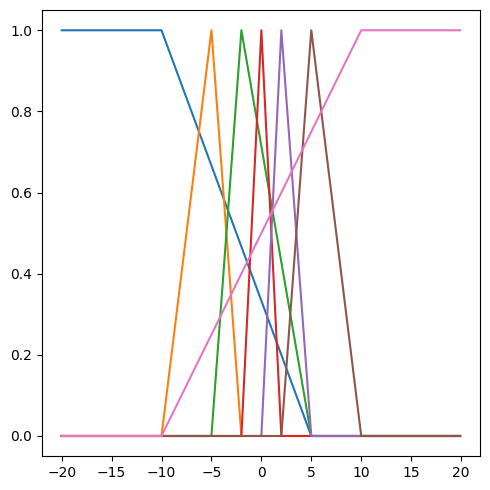

In [96]:
anim_fig = plt.figure(figsize=(5, 5), tight_layout=True)

for i in range (y.shape[1]):
    plt.plot(X,y[:,i])

plt.show()

In [102]:
y_sal=np.zeros(y.shape[0])
for i,y_ent in enumerate(y): 
    y_sal[i] = func_deFuzzificacion(y_ent,M,[0,1,2,3,4,5,6])  
# print(y_sal)

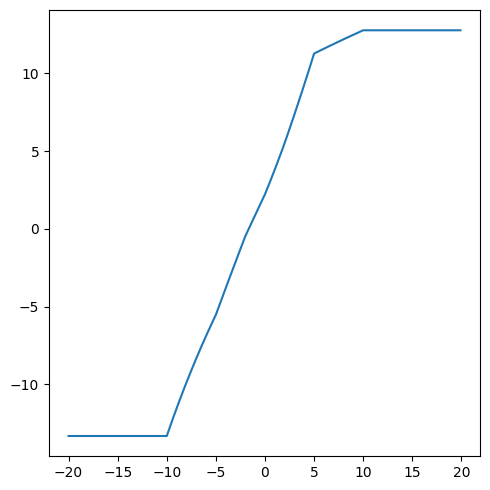

In [98]:
anim_fig = plt.figure(figsize=(5, 5), tight_layout=True)

plt.plot(X,y_sal)

plt.show()

# Ejercicio 7

In [107]:
def func_temperatura (t_i,q,t_1):
    a=40/41
    t_f = t_i + a*q + a*(t_1-t_i)
    return t_f

In [110]:
M1=np.array([[-20, -20, -10, 5],[-10, -5, -5, -2],[-5, -2, -2, 0],[-2, 0, 0, 2],[0, 2, 2, 5],[2, 5, 5, 10],[5, 10, 20, 20]])
M2=np.array([[-20, -20, -10, 5],[-10, -5, -4, -2],[-4, -2, -1, 0],[-1, 0, 0, 1],[0, 1, 2, 4],[2, 4, 5, 10],[5, 10, 20, 20]])
S1=np.array([[-7, -5, -5, 3],[-5, -3, -3, -1],[-3, -1, -1, 0],[-1, 0, 0, 1],[0, 1, 1, 3],[1, 3, 3, 5],[3, 5, 5, 7]])
S2=np.array([[-7, -5, -5, 4],[-5, -4, -4, -3],[-4, -3, -3, 0],[-3, 0, 0, 3],[0, 3, 3, 4],[3, 4, 4, 5],[4, 5, 5, 7]])

t_i = 15
t_f = 15
e=t_f - t_i
t_i = np.repeat(15,30)
t_i = np.append(t_i, np.repeat(25,170))
for i in t_i
    q,y = ctrl_borroso(e,M1,S1,[0,1,2,3,4,5,6])
    

    
